                      Нижегородский государственный университет имени Н. И. Лобачевского

                                          Радиофизический факультет

                                            Кафедра математики
                                            
                            Отчет по лабораторной работе "Решение задачи Коши"

                                              
                                                 Вариант 14
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                          Выполнил: Котов А.в , 430 гр.
                                          
                                                                          Проверил: Шиндин А. В.

                                         Нижний Новгород, 2016 год.

# Метод разложения в ряд Тейлора
Простейшим способом построения приближенного решения в точке $x_{n+1}$
сетки $ω_N$ является способ, основанный на разложении решения в ряд
Тейлора в предыдущей точке сетки $x_n$ по степеням шага h:
$$y(x_n+1) = y(x_n) + h_4(x_n, y_n, h)$$
$$\delta (x, y, h) ≡ y'(x) + \frac{h}{2} y"(x) + \frac{h^2}{3!}y'''(x)+......$$
Взяв вместо этого ряда конечный его отрезок
$$ϕ_p(x, y, h) ≡ y'(x) + \frac{h}{2}y"(x) + . . . + \frac{h_{p−1}}
{p!} y^{(p)}(x)$$
и заменяя в нем производные $$y_{(k)} (x)$$ в силу дифференциального урав-
нения
$$y' (x) = f (x, y (x)) ,$$
$$y" (x) = \frac{d}{dx} f (x, y (x)) = f'_x + f'_yf,$$
$$y''' (x) = \frac{d}{dx}f'_x + f'_yf´ = f''_{xx} + f'_{x}f'_y + ((f'_y)^2+2f''_{xy})f+f''_{yy}f^2, . . . ,$$
получаем последовательность приближений
$$y_{n+1} = y_n + hϕ_p(x_n, y_n, h), n = 0, 1, 2, . . . . $$
Отсюда, в частности, при $p = 1$ получаем схему
$$y_{n+1}=y_n +hϕ(x_n,y_n,h)$$ $$y_0 =y^0,$$  
(метод Эйлера), а при p = 2 - схему
$$y_{n +1}=y_n +h[f(x_n,y_n)+\frac{h}{2}(f_x(x_n,y_n)+f_y(x_n,y_n)f(x_n,y_n))]$$
Алгоритмы не требуют вычисления дополнительных началь-
ных условий и позволяют легко менять шаг интегрирования. Примени-
мость данных методов ограничена теми задачами, для которых легко
вычисляются частные производные высоких порядков функции $f(x, y)$.


 Решить методом Тейлора 4-ого порядка задачу коши

$$\begin{cases}
  y''+y = x*e^{-x}~~~~~~~~~x\in {[0;2]} \\
  y(0) = 1,~y'(0) = 0
 \end{cases}$$

с заданной относительной точностью 0,01

In [12]:
%matplotlib inline
import matplotlib
matplotlib.rc('font', family='Verdana')
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp,sin,cos
from numpy import linalg as l
from scipy import *
from scipy.linalg import *
from scipy.misc import *
from sympy import *
init_printing()

In [13]:
def dy(x,y,dy1):
    dy2=-y+x*exp(-x)
    return dy2
def teilor(f,x0,y0,s): 
    u=Symbol('u')
    t=Symbol('t')
    m=Symbol('m')
    p=0
    h = (x0[1]-x0[0])/s 
    x = np.linspace(x0[0],x0[1],s)
    n = 2
    y = np.zeros((n,s))    
    for i in range(0,n):
        y[i][0] = y0[i]
    for i in range(0,s-1):
        #y[1][i+1]=y[1][i]+h*d2y(x[i],y,i) + h*h/2*(diff(func(t,u),t).evalf(subs={t:x[i],u:y[0][i]}))
        a=dy(x[i],y[0][i],y[1][i])+(h/2)*(diff(dy(t,u,m),t).evalf(subs={t:x[i],u:y[0][i],m:y[1][i]})+ dy(x[i],y[0][i],y[1][i])*diff(dy(t,u,m),u).evalf(subs={t:x[i],u:y[0][i],m:y[1][i]}))
        y[1][i+1]=y[1][i]+h*a
        a=y[1][i]+(h/2)*dy(x[i],y,i)
        y[0][i+1] = y[0][i] + h *(y[1][i]+(h/2)*dy(x[i],y[0][i],y[1][i]))        
    x = np.linspace(x0[0],x0[1],s)
    plt.grid(True)
    plt.title('Вид искомой функции')
    plt.ylabel('Y')
    plt.xlabel('X ')
    st='Y(x)'
    plt.plot(x,y[0][:],label=st)
    plt.legend(loc=3)
    plt.grid(True)
    plt.title('Вид искомой функции')
    plt.ylabel('dy/dx')
    plt.xlabel('X ')
    st='dy/dx'
    plt.plot(x,y[0][:],'r-',label=st)
    plt.legend(loc=3)
    plt.show()
    plt.grid(True)
    plt.title('Фазовая траектория')
    plt.ylabel('dY/dx')
    plt.xlabel('Y ')
    plt.plot(y[0][:],y[1][:])
    plt.show()
    plt.grid(True)
    plt.title('Разность')
    plt.ylabel('')
    plt.xlabel('Y ')
    plt.plot(x,y[0][:]-(0.5*np.cos(x)+0.5*(x+1)*np.exp(-x)))
    plt.show()
    

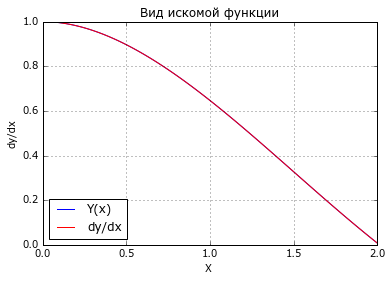

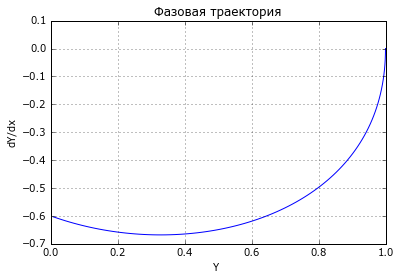

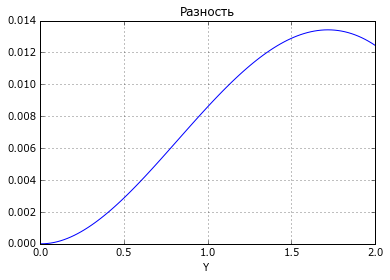

Для функции, полученной теоретически


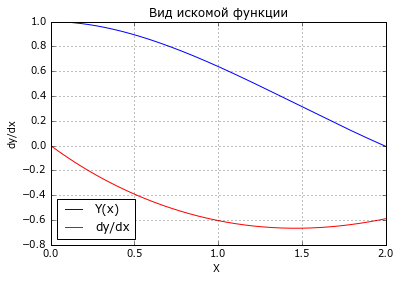

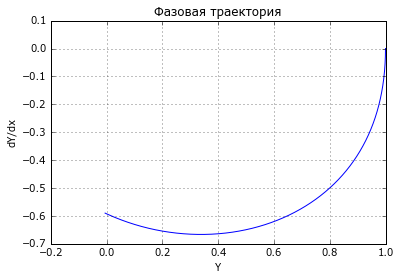

In [16]:
teilor(dy,[0,2],[1,0],100)


print('Для функции, полученной теоретически')
x = np.linspace(0,2,10000)
plt.grid(True)
plt.title('Вид искомой функции y(x)')
plt.ylabel('Y')
plt.xlabel('X ')
st='Y(x)'
plt.plot(x,(0.5*np.cos(x)+0.5*(x+1)*np.exp(-x)),'-',label=st)
plt.legend(loc=3)
plt.grid(True)
plt.title('Вид искомой функции')
plt.ylabel('dy/dx')
plt.xlabel('X ')
st='dy/dx'
plt.plot(x,(-0.5*np.sin(x)-0.5*(x+1)*np.exp(-x)+0.5*np.exp(-x)),'r-',label=st)
plt.legend(loc=3)
plt.show()
plt.grid(True)
plt.title('Фазовая траектория')
plt.ylabel('dY/dx')
plt.xlabel('Y')
plt.plot((0.5*np.cos(x)+0.5*(x+1)*np.exp(-x)),(-0.5*np.sin(x)-0.5*(x+1)*np.exp(-x)+0.5*np.exp(-x)))
plt.show()

# Решение Методом Рунге-Кутты 4

Идея этих методов заключается в построении функций ϕ, которые неиспользуют явно производных функции f(x, y) и в то же время ”наилучшим образом” приближают соответствующие отрезки $ ϕ_p $ ряда Тейлора.
Продемонстрируем процесс ”подгонки” рядов Тейлора следующим образом. 
Положим:
$$ ϕ(x, y, h) ≡ c_1f(x, y) + c_2f(x + ha_2, y + b_{21}hf(x, y))$$
где $c_1, c_2, a_2, b_{21}$ - постоянные, подлежащие определению. Разлагая $ ϕ $ по
степеням $h$ до членов порядка $h_2$, получим
$$ϕ(x, y, h) = (c_1 + c_2)f(x, y) + hc_2[a_2fx(x, y) + b_{21}fy(x, y)f(x, y)] + O(h_2).$$
С другой стороны,
$$ \delta (x, y, h) = f(x, y) + 0.5h[fx(x, y) + fy(x, y)f(x, y)] + O(h_2). $$
Отсюда видно, что взяв
$$c_1+c_2=1$$
$$c_2a_2=0.5 $$
$$c_1b_{21}=0.5 $$
получаем функцию, для которой
$$ ϕ(x, y, h) − \delta (x, y, h) = O(h_2).$$
Алгебраическая система (9) имеет множество решений вида
$c_1 = 1 − α, c_2 = α, a_2 = b_{21} = \frac{1}{2α}$
,
где $α4$ - свободный параметр
Процесс ”подгонки” рядов Тейлора можно продолжить, строя функции $ϕ(x, y, h)$, использующие все большие отрезки ряда Тейлора. Подобным образом получают m-кратные явные методы Рунге-Кутты:
$$y_{n+1}=y_n +hϕ(x_n,y_n,h)$$ $$y_0 =y^0,$$ 
$$ϕ(x, y, h) ≡\sum \limits_{r=0}^m{c_rk_r}$$
$$k_1 ≡ f(x, y), k_r ≡ f(x + ha_r, y + h\sum \limits_{s=0}^{r-1}{b_{rs}k_s})
r = 2,..., m$$
требующие m вычислений функции $f (x, y)$ на каждом шаге.
Наиболее известным из них является четырехкратный метод:
$$y_{n +1}=y_n+\frac{h}{6}(k_1+2k_2+2k_3+k4)$$ $$y_0=y^0$$
$$k1 ≡ f(xn, yn),$$
$$k 2 ≡ f(x_n + 0.5h, y_n + 0.5hk_1),$$
$$ k3 ≡ f(x_n + 0.5h, y_n + 0.5hk_2), $$
$$ k4 ≡ f(x_n + h, y_n + hk_3). $$
Алгоритмы Рунге-Кутты отлично приспособлены для практических
вычислений: они не требуют вычисления дополнительных начальных
данных и легко позволяют менять шаг h.

In [4]:
from scipy import *
from scipy.linalg import *
from scipy.misc import *
from sympy import *
init_printing()

In [5]:
def f(t, y):
    f = np.zeros((2),'float')
    f[0] = y[1]
    f[1] = -y[0]+t*np.exp(-t)
    return f
def koef(f, t, y, tau):
        k0 =tau*f(t,y)
        k1 =tau*f(t+tau/2.,y+k0/2.)
        k2 =tau*f(t+tau/2.,y+k1/2.)
        k3 =tau*f(t+tau, y + k2)
        return (k0 + 2.*k1 + 2.*k2 + k3) / 6.

def RK(f, x0, y0, tau):
    t = []
    y = []
    t.append(x0[0])
    y.append(y0)
    tau=0.00025
    while x0[0] < x0[1]:
        tau = min(tau, x0[1] - x0[0])
        y0 = y0 + koef(f, x0[0], y0, tau)
        x0[0] = x0[0] + tau
        t.append(x0[0])
        y.append(y0)    
    y=np.array(y)
    for n in range(0, 2):
        r = y [:, n]
        st = '$y$'
        sg = '-'
        if n == 1:
            st = '$\\frac{d y}{dt}$'
            sg ='r-'
        plt.title('Искомая функция')
        plt.plot(t, r, sg, label=st)
    plt.legend(loc=3)
    plt.xlabel('X')
    plt.grid(True)
    plt.show()

    plt.grid(True)
    plt.title('Фазовая Траектория')
    plt.xlabel('Y')
    plt.ylabel('dy/dx')
    plt.plot(y[:, 0], y[:, 1])
    plt.show()

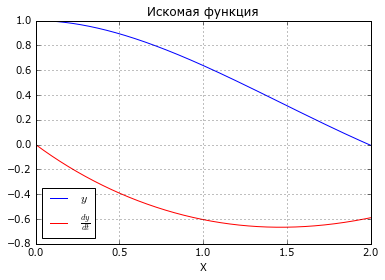

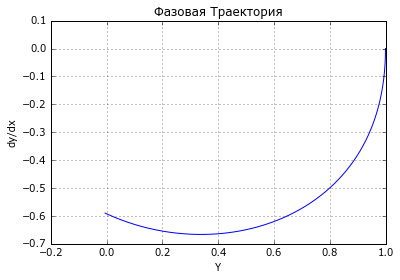

In [6]:
RK(f, [0,2], [1,0], 0.00025)